In [0]:
# Load the sample bakehouse sales_suppliers data
df = spark.table("samples.bakehouse.sales_suppliers")

# Display schema
print("Schema:")
df.printSchema()

print(f"\nTotal rows: {df.count()}")

# Display sample data
print("\nSample data:")
display(df.limit(10))

Schema:
root
 |-- supplierID: long (nullable = true)
 |-- name: string (nullable = true)
 |-- ingredient: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- city: string (nullable = true)
 |-- district: string (nullable = true)
 |-- size: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- approved: string (nullable = true)


Total rows: 27

Sample data:


supplierID,name,ingredient,continent,city,district,size,longitude,latitude,approved
4000000,Cacao Wonders,cacao,South America,Guayaquil,Las Peñas,M,-79.8974,-2.1791,Y
4000001,Coconut Grove,coconut,Asia,Manila,Intramuros,S,121.0221,14.6042,Y
4000002,Almond Delights,almonds,Europe,Valencia,Ruzafa,L,-0.3762,39.4699,Y
4000003,Sugar Cane Harvest,cane sugar,South America,Sao Paulo,Vila Madalena,XL,-46.6333,-23.5489,Y
4000004,Vanilla Valley,vanilla,North America,Mexico City,Roma Norte,M,-99.1332,19.4326,Y
4000005,Pecan Pleasures,pecans,North America,Atlanta,Virginia-Highland,S,-84.3888,33.749,Y
4000006,Hazelnut Haven,hazelnuts,Europe,Istanbul,Kadıköy,XXL,28.9784,41.0082,Y
4000007,Cinnamon Spice,cinnamon,Asia,Colombo,Galle Face Green,L,79.8612,6.9271,Y
4000008,Cashew Corner,cashews,Asia,Goa,Anjuna Beach,XL,73.8067,15.3173,Y
4000009,Maple Monarch,maple syrup,North America,Montreal,Plateau Mont-Royal,M,-73.5673,45.5017,Y


Summary Statistics for Numeric Columns:
+-------+-----------------+------------------+-----------------+
|summary|       supplierID|         longitude|         latitude|
+-------+-----------------+------------------+-----------------+
|  count|               27|                27|               27|
|   mean|        4000013.0|16.027855555555554|20.23922962962963|
| stddev|7.937253933193772| 69.89654283116933|19.50410762397372|
|    min|          4000000|          -99.1332|         -23.5489|
|    25%|          4000006|          -66.9036|           6.9271|
|    50%|          4000013|           27.1384|          15.3173|
|    75%|          4000020|           75.7804|          38.4237|
|    max|          4000026|          128.1753|          55.9533|
+-------+-----------------+------------------+-----------------+


Detailed Statistics:
+-------+------------------+-----------------+
|summary|         longitude|         latitude|
+-------+------------------+-----------------+
|  count|       

Distribution by Ingredient:
+------------+-----+
|  ingredient|count|
+------------+-----+
|    cardamom|    1|
|      ginger|    1|
|sesame seeds|    1|
|     raisins|    1|
|  pistachios|    1|
|      coffee|    1|
| maple syrup|    1|
|       honey|    1|
|     peanuts|    1|
|    cinnamon|    1|
|     coconut|    1|
|      pecans|    1|
|     vanilla|    1|
|        oats|    1|
|       cacao|    1|
|   hazelnuts|    1|
|  cane sugar|    1|
|    molasses|    1|
|     almonds|    1|
|     cashews|    1|
+------------+-----+
only showing top 20 rows

Distribution by Continent:
+---------------+-----+
|      continent|count|
+---------------+-----+
|           Asia|   11|
|         Europe|    5|
|  South America|    4|
|         Africa|    3|
|  North America|    3|
|Central America|    1|
+---------------+-----+


Distribution by Size:
+----+-----+
|size|count|
+----+-----+
|   M|    7|
|   S|    7|
|  XL|    5|
|   L|    5|
| XXL|    3|
+----+-----+


Distribution by Approval Status:

Null Value Counts by Column:
+----------+----+----------+---------+----+--------+----+---------+--------+--------+
|supplierID|name|ingredient|continent|city|district|size|longitude|latitude|approved|
+----------+----+----------+---------+----+--------+----+---------+--------+--------+
|         0|   0|         0|        0|   0|       0|   0|        0|       0|       0|
+----------+----+----------+---------+----+--------+----+---------+--------+--------+


Duplicate Check:
Total rows: 27
Unique supplier IDs: 27
Duplicates: 0

Distinct Value Counts:
ingredient: 27 distinct values
continent: 6 distinct values
city: 27 distinct values
size: 5 distinct values
approved: 1 distinct values


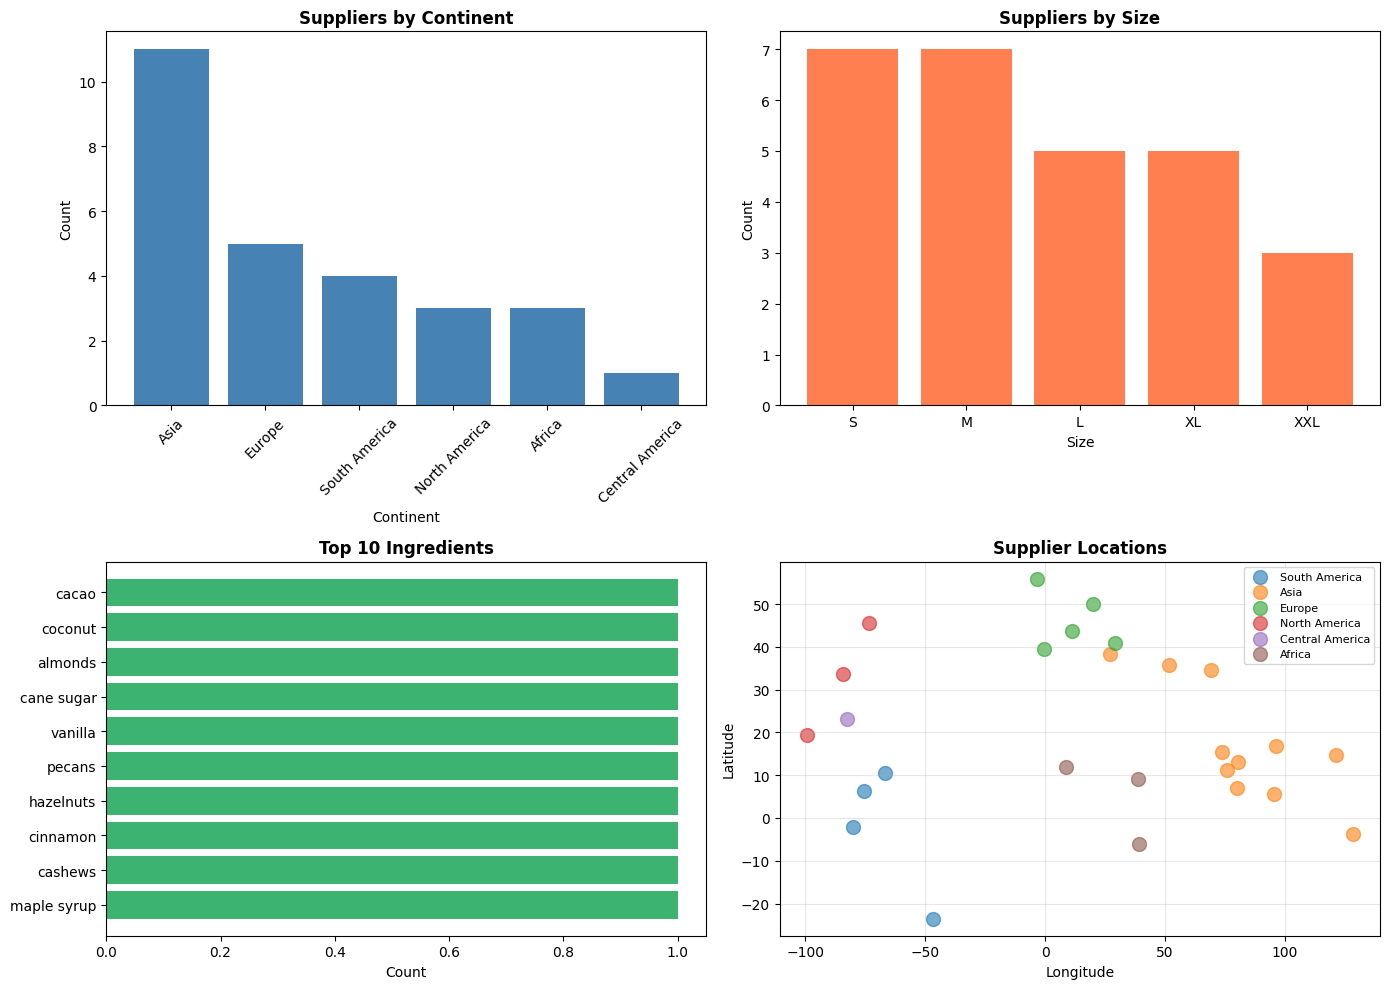

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to pandas for visualization
df_pd = df.toPandas()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Suppliers by continent
continent_counts = df_pd['continent'].value_counts()
axes[0, 0].bar(continent_counts.index, continent_counts.values, color='steelblue')
axes[0, 0].set_title('Suppliers by Continent', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Continent')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Suppliers by size
size_order = ['S', 'M', 'L', 'XL', 'XXL']
size_counts = df_pd['size'].value_counts().reindex(size_order, fill_value=0)
axes[0, 1].bar(size_counts.index, size_counts.values, color='coral')
axes[0, 1].set_title('Suppliers by Size', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Size')
axes[0, 1].set_ylabel('Count')

# 3. Top ingredients
ingredient_counts = df_pd['ingredient'].value_counts().head(10)
axes[1, 0].barh(ingredient_counts.index, ingredient_counts.values, color='mediumseagreen')
axes[1, 0].set_title('Top 10 Ingredients', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Count')
axes[1, 0].invert_yaxis()

# 4. Geographic scatter plot
for continent in df_pd['continent'].unique():
    continent_data = df_pd[df_pd['continent'] == continent]
    axes[1, 1].scatter(continent_data['longitude'], continent_data['latitude'], 
                      label=continent, alpha=0.6, s=100)
axes[1, 1].set_title('Supplier Locations', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')
axes[1, 1].legend(loc='best', fontsize=8)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()